In [127]:
import sys, os
from datetime import datetime
sys.path.append(os.path.abspath('./lib'))
import pandas as pd
import numpy as np
import importlib
import Environment as env_mod
import truck as truck_mod
import DataArrangement as data_mod

# simulator class
importlib.reload(env_mod)
SimulationConfig = env_mod.SimulationConfig
Simulator = env_mod.Simulator


# truck class
importlib.reload(truck_mod)  # ← ここでファイルの変更を反映
Truck = truck_mod.Truck      # 以後はこの Truck を使う
create_fleet = truck_mod.create_fleet

# data arrangement class
importlib.reload(data_mod)
DataArrange = data_mod.DataArrange

In [128]:
# Create trucks fleet (10trucks, attached 5 parts)
fleet = create_fleet(10, model_id="M0", id_prefix="TRK")

# Simulator Configuration
cfg = SimulationConfig(
    start_time = datetime(2025, 1, 1),
    total_time = 365,
    delta_time = 1
)

# Simulator
sim = Simulator(config=cfg, fleet=fleet)
events = sim.run()
print(events)

[DemandEvent(day=1, truck_id='TRK003', model_id='M0', truck_age=1, part_id='TRK003-oil_filter-000', part_type='oil_filter', part_age=1), DemandEvent(day=2, truck_id='TRK002', model_id='M0', truck_age=2, part_id='TRK002-tire-001', part_type='tire', part_age=2), DemandEvent(day=6, truck_id='TRK003', model_id='M0', truck_age=6, part_id='TRK003-brake_pad-000', part_type='brake_pad', part_age=6), DemandEvent(day=8, truck_id='TRK008', model_id='M0', truck_age=8, part_id='TRK008-oil_filter-000', part_type='oil_filter', part_age=8), DemandEvent(day=10, truck_id='TRK009', model_id='M0', truck_age=10, part_id='TRK009-tire-008', part_type='tire', part_age=10), DemandEvent(day=11, truck_id='TRK003', model_id='M0', truck_age=11, part_id='TRK003-tire-000', part_type='tire', part_age=11), DemandEvent(day=11, truck_id='TRK009', model_id='M0', truck_age=11, part_id='TRK009-oil_filter-000', part_type='oil_filter', part_age=11), DemandEvent(day=12, truck_id='TRK000', model_id='M0', truck_age=12, part_id=

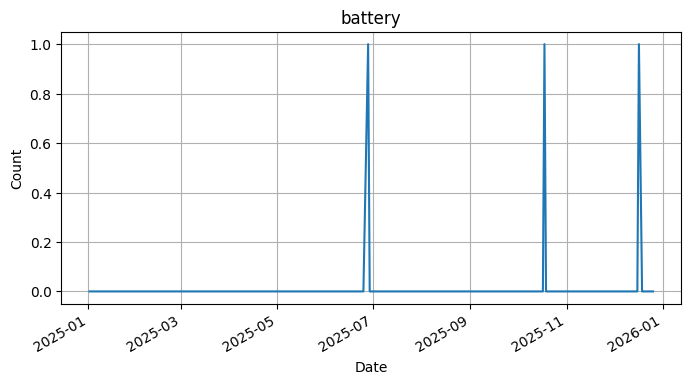

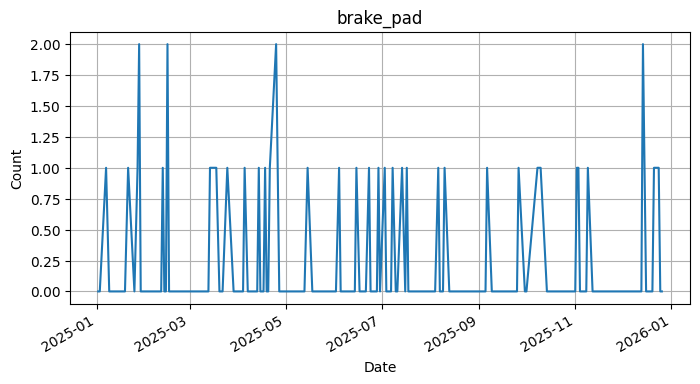

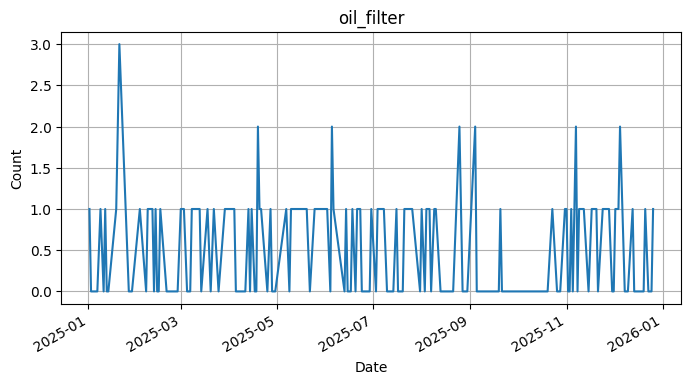

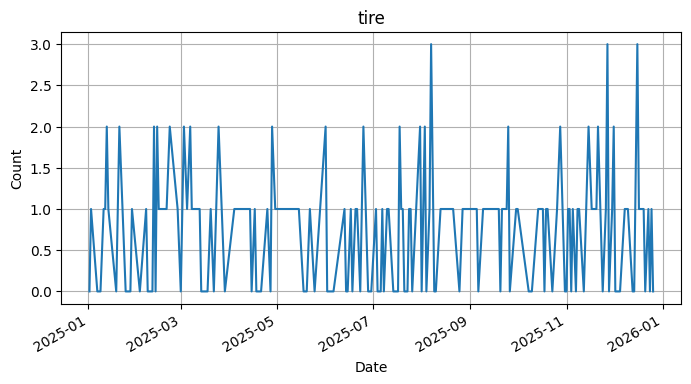

In [129]:
import matplotlib.pyplot as plt

# Data Arrangement
data_arrange = DataArrange(events=events, start_time=cfg.start_time)

# each part data
for col in data_arrange.part_data.columns:
    data_arrange.part_data[col].plot(figsize=(8,4), title=col)
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()





In [130]:
# truck test sample
tid = "IXX"
tmodel = "MXX"
truck_xx = Truck(truck_id = tid, model_id = tmodel)
for part in truck_xx.parts:
    print(part.part_id)

IXX-tire-000
IXX-tire-001
IXX-tire-002
IXX-tire-003
IXX-tire-004
IXX-tire-005
IXX-tire-006
IXX-tire-007
IXX-tire-008
IXX-tire-009
IXX-brake_pad-000
IXX-brake_pad-001
IXX-oil_filter-000
IXX-battery-000
